<a href="https://colab.research.google.com/github/jakariaemon/ComputerVision/blob/main/mid_term_assignment/Cifer10_Adam_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
import numpy as np 

In [ ]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape 

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

TypeError: ignored

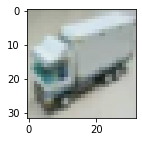

In [ ]:
import matplotlib.pyplot as plt 

def plot_sample(X , y , index):
    plt.figure(figsize=(15 , 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train , y_train , 53)

In [ ]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32 , (3,3) , activation="relu" ,input_shape = (32,32,3)),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Flatten(),
    Dense(64 , activation="relu"),
    Dense(10  ,activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [ ]:
h=model.fit(X_train , y_train , epochs=10 , validation_data=(X_test , y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6835 - accuracy: 0.7590 - val_loss: 0.9151 - val_accuracy: 0.6954
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6594 - accuracy: 0.7671 - val_loss: 0.8887 - val_accuracy: 0.7069
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6357 - accuracy: 0.7757 - val_loss: 0.9477 - val_accuracy: 0.6894
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6150 - accuracy: 0.7834 - val_loss: 0.8743 - val_accuracy: 0.7123
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5880 - accuracy: 0.7924 - val_loss: 0.8945 - val_accuracy: 0.7076
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5734 - accuracy: 0.7975 - val_loss: 0.8734 - val_accuracy: 0.7185
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5539 - accuracy: 0.8044 - val_loss: 0.8910 - val_ac

In [ ]:

model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8973 - accuracy: 0.6954


[0.8972642421722412, 0.6953999996185303]

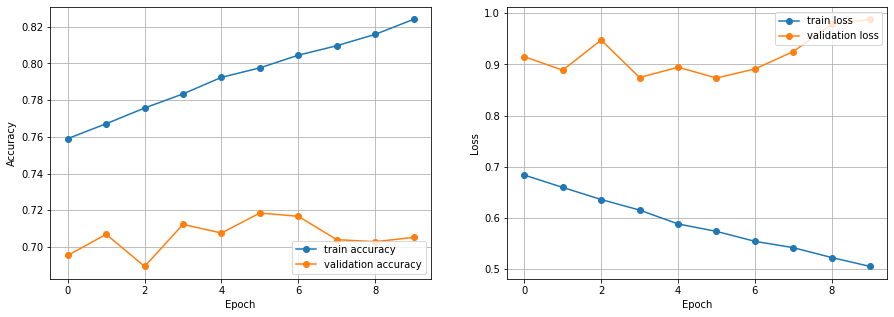

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()